# Exploring our cluster expansions

Here we will explore the forms of our cluster expansions in particular the energies associated with certain terms. The plotting in this book provides a degree of information regarding the non zero terms in the cluster expansion. We note as in the main paper that there are no non-zero four body clusters in either cluster expansion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams.update({
    "pdf.use14corefonts": True
})
from matplotlib import rc
#rc('font', family='Helvetica Neue')
from matplotlib import ticker
from icet import ClusterExpansion

/Users/swc57/miniconda3/envs/p3p7/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## DFT cluster expansion

In [2]:
ce = ClusterExpansion.read("fitting/Sulfur/Li2FeSO.ce")
df_ecis = ce.to_dataframe()

For both cluster expansions we plot the madnitude of the ECIs of interest alongside their radius, the position of clusters for which the eci is set as zero is shown in orange.

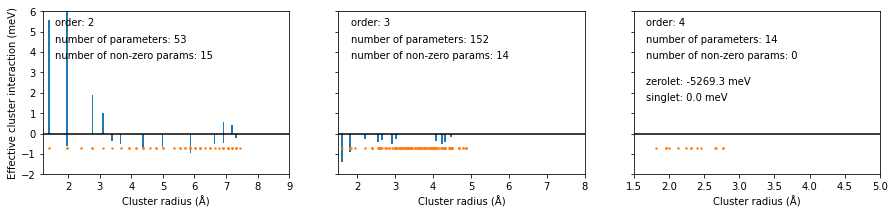

In [3]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
for k, order in enumerate(ce.orders):
    df_order = df_ecis.loc[df_ecis['order'] == order]
    if k < 2 or k > 4:
        continue
    ax = axs[k - 2]
    ax.set_ylim((-2, 6))
    ax.set_xlabel(r'Cluster radius (Å)')
    if order == 2:
        ax.set_xlim((1.2, 9))
        ax.set_ylabel(r'Effective cluster interaction (meV)')
    if order == 3:
        ax.set_xlim((1.5, 8))
    if order == 4:
        ax.set_xlim((1.5, 5))
        ax.text(0.05, 0.55, 'zerolet: {:.1f} meV'
                .format(1e3 * df_ecis.eci.iloc[0]),
                transform=ax.transAxes)
        ax.text(0.05, 0.45, 'singlet: {:.1f} meV'
                .format(1e3 * df_ecis.eci.iloc[1]),
                transform=ax.transAxes)
    ax.plot([0, 10], [0, 0], color='black')
    ax.bar(df_order.radius, 1e3 * df_order.eci, width=0.05)
    ax.scatter(df_order.radius, len(df_order) * [-0.7],
               marker='o', s=2.0)
    ax.text(0.05, 0.91, 'order: {}'.format(order),
            transform=ax.transAxes)
    ax.text(0.05, 0.81, 'number of parameters: {}'.format(len(df_order)),
            transform=ax.transAxes,)
    ax.text(0.05, 0.71, 'number of non-zero params: {}'
            .format(np.count_nonzero(df_order.eci)),
            transform=ax.transAxes,)

These plots show as expected the cluster expansion is dominated by pairs, with terms generally declining with distance. There are no non zero 4 body terms though they were included in the fitting procedure. 

In [4]:
np.savetxt('DFT_2_body.csv',np.transpose([df_ecis.radius[(df_ecis['order'] == 2)*df_ecis.eci!=0], 1e3 * df_ecis.eci[(df_ecis['order'] == 2)*df_ecis.eci!=0]]))
np.savetxt('DFT_3_body.csv',np.transpose([df_ecis.radius[(df_ecis['order'] == 3)*df_ecis.eci!=0], 1e3 * df_ecis.eci[(df_ecis['order'] == 3)*df_ecis.eci!=0]]))

## Ewald cluster expansion

In [5]:
ce = ClusterExpansion.read("fitting/Coulomb/Ewald.ce")
df_ecis = ce.to_dataframe()

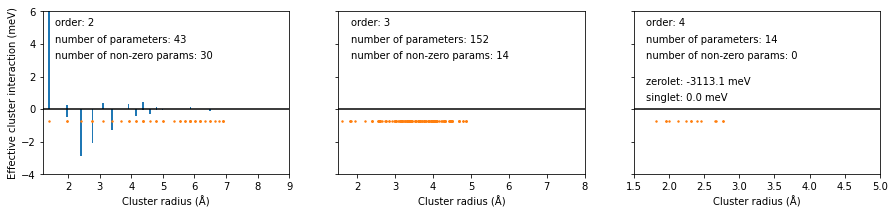

In [6]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
for k, order in enumerate(ce.orders):
    df_order = df_ecis.loc[df_ecis['order'] == order]
    if k < 2 or k > 4:
        continue
    ax = axs[k - 2]
    ax.set_ylim((-4, 6))
    ax.set_xlabel(r'Cluster radius (Å)')
    if order == 2:
        ax.set_xlim((1.2, 9))
        ax.set_ylabel(r'Effective cluster interaction (meV)')
    if order == 3:
        ax.set_xlim((1.5, 8))
    if order == 4:
        ax.set_xlim((1.5, 5))
        ax.text(0.05, 0.55, 'zerolet: {:.1f} meV'
                .format(1e3 * df_ecis.eci.iloc[0]),
                transform=ax.transAxes)
        ax.text(0.05, 0.45, 'singlet: {:.1f} meV'
                .format(1e3 * df_ecis.eci.iloc[1]),
                transform=ax.transAxes)
    ax.plot([0, 10], [0, 0], color='black')
    ax.bar(df_order.radius, 1e3 * df_order.eci, width=0.05)
    ax.scatter(df_order.radius, len(df_order) * [-0.7],
               marker='o', s=2.0)
    ax.text(0.05, 0.91, 'order: {}'.format(order),
            transform=ax.transAxes)
    ax.text(0.05, 0.81, 'number of parameters: {}'.format(len(df_order)),
            transform=ax.transAxes,)
    ax.text(0.05, 0.71, 'number of non-zero params: {}'
            .format(np.count_nonzero(df_order.eci)),
            transform=ax.transAxes,)

The ewald cluster expansion is totaly dominated by pairs, this makes sense as electrostatic energies are readily decomposable to pairwise terms and with no off lattice distortions there will be no effect of three or four body terms.

In [7]:
np.savetxt('EW_2_body.csv',np.transpose([df_ecis.radius[(df_ecis['order'] == 2)*df_ecis.eci!=0], 1e3 * df_ecis.eci[(df_ecis['order'] == 2)*df_ecis.eci!=0]]))
np.savetxt('EW_3_body.csv',np.transpose([df_ecis.radius[(df_ecis['order'] == 3)*df_ecis.eci!=0], 1e3 * df_ecis.eci[(df_ecis['order'] == 3)*df_ecis.eci!=0]]))